In [1]:
include("canvas.jl")

clear! (generic function with 1 method)

In [2]:
using Images

In [3]:
function display_normals!(image::Matrix{RGB{T}}, normals::Array{T,3}, dists::Matrix{T}) where {T <: AbstractFloat}
    for I in CartesianIndices(image)
        rg = @view normals[:,I]
        dist = dists[I]
        fac = dist < 0 ? 0.5 : 1.0
        t(x) = (x*0.3+0.5)*fac
        image[I] = RGB(t(rg[1]), t(rg[2]), fac*0.5)
    end
    return image
end
function display_normals(normals::Array{T,3}, dists::Matrix{T}) where {T <: AbstractFloat}
    image = Array{RGB{T}}(undef, size(normals)[2:end]...)::Array{RGB{T}, 2}
    return display_normals!(image, normals, dists)'
end
display_normals(canvas::Canvas) = display_normals(canvas.normals, canvas.grid)

display_normals (generic function with 2 methods)

In [4]:
canvas = Canvas(10, 10, 0.025, 4);

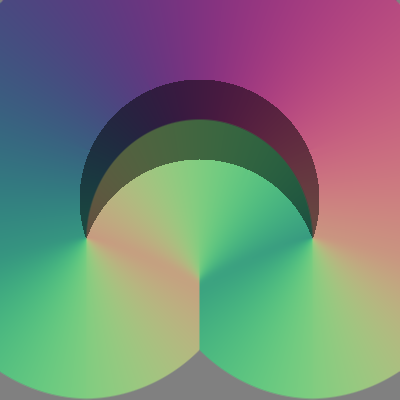

In [5]:
clear!(canvas)
circle1 = Circle(3.0, Transform(5, 5))
circle2 = Circle(3.0, Transform(5, 7))
shape = Intersect([circle1, Negate(circle2)], Transform())
draw!(canvas, shape)
display_normals(canvas)

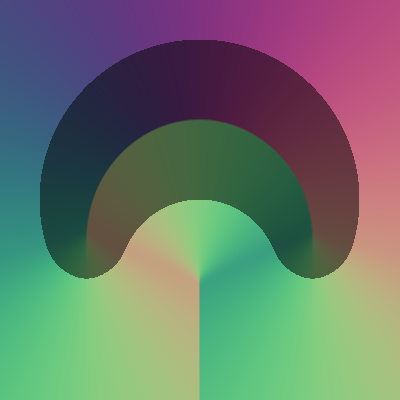

In [6]:
displace!(canvas, 1.0)
display_normals(canvas)

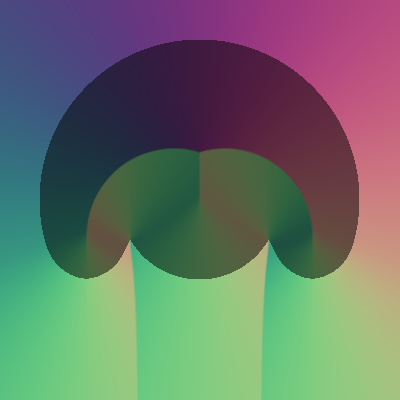

In [7]:
circle3 = Circle(2.0, Transform(5, 5))
draw!(canvas, circle3)
display_normals(canvas)

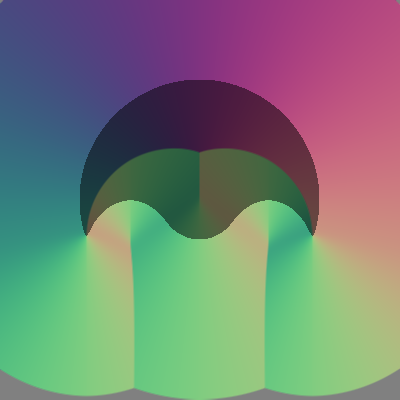

In [8]:
displace!(canvas, -1)
display_normals(canvas)

In [9]:
include("selectors.jl")

selectnorm (generic function with 1 method)

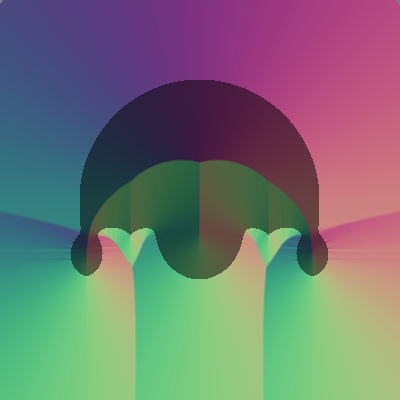

In [10]:
displace!(canvas, 1.0, selectnorm(pi/2, 2))
display_normals(canvas)

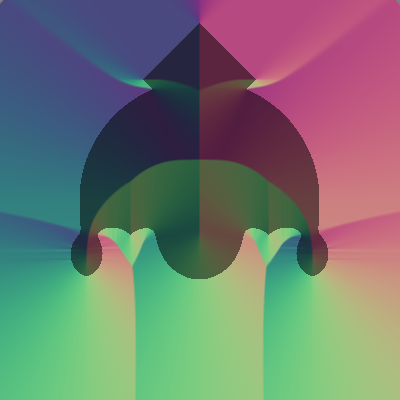

In [11]:
square=Square(1.0, Transform(5, 2, pi/4))
draw!(canvas, square)
display_normals(canvas)